# Анализ оттока клиентов банка "Метанпромбанк"

### Описание проекта

Отток клиентов может возникать по разным причинам. Клиенты начинают уходить, если не удовлетворены качеством и видом банковских продуктов и услуг, их стоимостью, удобством использования, качеством предоставляемого сервиса; если теряется актуальность продуктов и услуг; если изменяется экономическая ситуация в семье, стране. Кроме того, отток может свидетельствовать о снижении конкурентной способности банка, если уход клиента связан с переходом в другой банк.

Прибыль банка напрямую зависит от количества обслуживаемых клиентов. Поэтому отток клиентов прежде всего сказывается на финансовых показателях банка: снижается количество клиентов — уменьшается ресурсная база банковской системы — уменьшается число вкладов и кредитов. Это приводит к снижению доходности и упущенным финансовым возможностям.

Отток клиентов из банка становится заметным, когда количество клиентов, которые перестают пользоваться услугами банка, превышает ожидаемый уровень. Ежемесячное отслеживание оттока помогает банку определить, какие клиенты уходят, и помогает изучить причины, по которым уходят клиенты.

Кроме того, отслеживание оттока клиентов помогает банку оценить эффективность своих маркетинговых усилий и стратегий удержания клиентов. Если банк знает, какие клиенты покидают его наиболее часто, он может сосредоточиться на улучшении своих маркетинговых кампаний и программ лояльности, чтобы удержать этих клиентов. Наконец, отслеживание ежемесячного оттока помогает банку оценивать свою конкурентоспособность на рынке.

Основная задача - проанализировать клиентов регионального банка и выделите сегменты клиентов,
которые склонны уходить из банка.
Заказчик - отдел маркетинга "Метанпромбанк"

### Цель исследования 

Снизить отток клиентов банка, изучив их поведение и факторов, влияющих на отток - как усиливающих, так и удерживающих.

### План выполнения работы

#### Загрузка и обзор данных

* загрузка и обзор данных
* проверка  на соответствие типов данных
* осуществление проверки на пропуски

#### Предобработка данных

* приведение данных к единому стилю/регистру
* осуществление проверки на дубликаты (явные/не явные)
* анализ пропусков и принятие решения по поводу их заполнения/удаления

#### Исследовательский анализ данных

* распределение признаков в разрезе оттока в целях выявления тенденций оттока/ удержания
* исследование коррелирующих признаков, построение тепловой карты

#### Проверка гипотез

* доход ушедших и действующих клиентов различен
* количество используемых банковских продуктов ушедших и действующих клиентов различно
* оценка собственности ушедших и действующих клиентов различна

#### Промежуточный вывод

* выбор признаков (на базе исследовательского анализа данных), которые станут основой для сегментации

#### Сегментизация пользователей

* сегментация клиентов с целью определения факторов оттока
* определение признаков оттока/надежности клиентов.

#### Выводы и рекомендации

### Ссылка на презентацию

https://docs.google.com/presentation/d/18v3l6Tx-kjJZtaUNkgy9z-U2S2e3k6oP0tRXgxGiGxo/edit?usp=sharing

### Загрузка данных и изучение общей информации

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import phik

Загружаю необходимые для работы библиотеки

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
data.tail()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


Изчуаю датасет - первые и последние 5 строк

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Сразу обращаю внимание на то, что столбцы имеют не единый стиль, который будем исправлять. По типу данных в столбцах у меня вопросов нет.

### Предобработка данных

#### Приведение столбцов к единому стилю

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data = data.rename(columns={'userid': 'user_id'})

In [9]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Привел стоолбцы к единому регистру и изменил название столбца userid на user_id

#### Проверка дубликатов

In [10]:
data.duplicated().sum()

0

Явные дубликаты по строкам отсутствуют

In [11]:
data['user_id'].duplicated(keep=False).sum()

146

По user_id 146 задублированных значений.

Далее для анализа дубликатов по user_id сначала посчитаю значения по user_id. Затем отфильтрую те, где значения не равны единице, после этого выведу строки с дублированным user_id с помощью атрибута index

In [12]:
user_id_duplicates_cnt = data['user_id'].value_counts()
user_id_duplicates = user_id_duplicates_cnt[user_id_duplicates_cnt != 1]
duplicates = user_id_duplicates[user_id_duplicates != 1].index[:10]
data[data['user_id'].isin(duplicates)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1080,155872,896.0,Ярославль,М,36.0,3,1113656.92,3,0,1,291176.85,1
9363,155872,714.0,Рыбинск,Ж,29.0,0,NaN,1,1,0,118052.84,0
9653,171751,862.0,Ярославль,М,42.0,4,481992.19,2,1,0,71816.86,0
4587,171751,874.0,Рыбинск,Ж,26.0,5,292054.42,2,0,1,20528.56,1
6005,188957,882.0,Рыбинск,Ж,64.0,3,893392.91,3,1,0,69622.58,0
5454,188957,853.0,Ярославль,М,35.0,1,374959.62,2,1,1,197600.97,1
1181,198635,896.0,Рыбинск,Ж,32.0,0,NaN,1,1,1,170866.01,0
8015,198635,670.0,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0


Смотря на строки с дубликатами, сразу видно, что клиенты с одинаковыми user_id имеют города проживания Ярославль и Рыбинск, а также разный пол. При этом, отсутствует город Ростов Великий, что может соответствовать техническому сбою. Иначе природу происхождения не описать.

#### Проверка пропусков

In [13]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Что касается пропусков, то столбец age имеет незначительное количество. А со столбцом balance можно поработать.

In [14]:
data['balance'].isna().sum()/len(data)*100

22.95

In [15]:
data['age'].isna().sum()/len(data)*100

0.26

Если брать процентное соотношение, то в стоблце balance почти 23% пропущенных значений, что довольно критично. А в столбце age пропущено 0,26% - их трогать нет смысла.

Для проверки данных на MAR (Missing At Random), мы сравним распределение других переменных между строками, где "balance" имеет пропуски, и строками, где значения "balance" присутствуют

Проанализирую часть датасета, которая содержит пропуски с помощью метода describe, сравнив результаты с описанием данных всего датасета.

In [16]:
display(data[data['balance'].isna()].describe())
display(data.describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.000000,2295.000000,2279.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2.295000e+03,2295.000000
mean,172069.447930,865.352070,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,2.263102e+05,0.005664
std,33337.084589,89.603091,11.941551,0.225872,NaN,0.402532,0.387824,0.497657,1.997718e+05,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203477e+05,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.741607e+05,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400150e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Исходя из анализа пропусков по столбцу balance, можно сделать следующие выводы, что клиенты, с не нулевым балансом:
1. Пользуются большим количеством продуктов, по сравнению к клиентами, у которых есть пропуски в балансе (1.87 продукт против 1.16 в среднем)
2. Имеют почти в два раза больше оценку собственности по баллам, чем клиенты с нулевым балансом
3. При этом, имеют меньший оценочный доход

Дальше хочу проверить, связаны ли пропуски с признаком оттока клиента

In [17]:
data[data['balance'].isna()]['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

После этой проверки становится понятно, что в 13 случаях пропуск может быть связан с тем, что клиент имеет признак оттока, то есть ушел из банка.
Определить точную природу пропусков не удается. Поэтому принимаю решение оставить их и отнесу их к категории MAR (Missing At Random/Отсутствуют случайно).

In [18]:
data_miss = data.drop(columns=['user_id'])
data_miss['balance_missing'] = np.where(data_miss['balance'].isnull(), 1, 0)
data_miss['age_missing'] = np.where(data_miss['age'].isnull(), 1, 0)

correlation_matrix = data_miss.corr()
print(correlation_matrix[['balance_missing', 'age_missing']]) 

                 balance_missing  age_missing
score                   0.138871     0.005035
age                    -0.028659          NaN
equity                 -0.709951    -0.032040
balance                      NaN     0.007686
products               -0.487512    -0.033751
credit_card             0.158334     0.009726
last_activity           0.028362     0.025120
est_salary              0.307154     0.011252
churn                  -0.249421    -0.018994
balance_missing         1.000000     0.046852
age_missing             0.046852     1.000000


Наиболее сильная положительная корреляция составляет 0.03, а отрицательная -0.5. Но никаких логичных выводов о природе пропусков по этой матрице сделать нельзя. Это доказывает то, что пропуски относятся к категории MAR (Missing At Random/Отсутствуют случайно).

#### Кодирование данных

Далее идем на кодирование данных с помощью get_dummies(). Сначала создадим копии столбцов city, gender

In [19]:
data['city_copy'] = data['city']
data['gender_copy'] = data['gender']
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy,gender_copy
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [20]:
data = pd.get_dummies(data, columns = ['city_copy', 'gender_copy'])
data = data.rename(
    columns = ({
        'city_copy_Ростов':'Ростов', 'city_copy_Рыбинск':'Рыбинск','city_copy_Ярославль':'Ярославль', 
        'gender_copy_Ж':'female', 'gender_copy_М':'male'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Данные успешно закодированы.

In [21]:
interval_cols = ['score', 'age', 'balance', 'est_salary']
data_without_id = data.drop(columns=['user_id'])
correlation_phik = data_without_id.phik_matrix(interval_cols=interval_cols)
churn_phik = correlation_phik['churn'].sort_values(ascending=False)

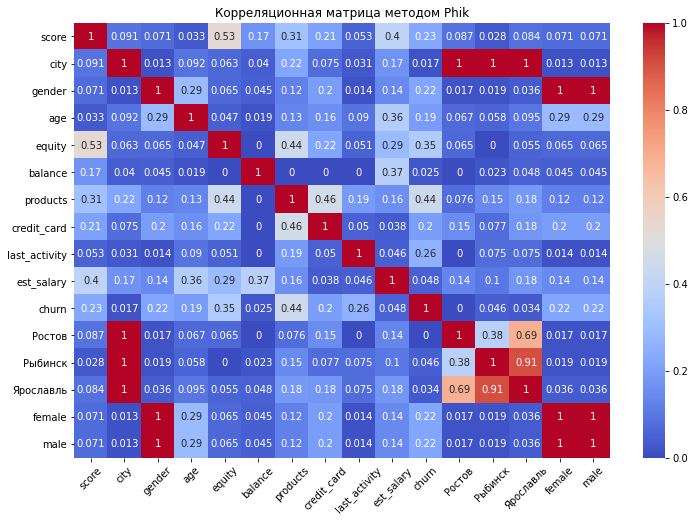

churn            1.000000
products         0.441363
equity           0.352726
last_activity    0.261174
score            0.229572
gender           0.218799
female           0.218799
male             0.218799
credit_card      0.202997
age              0.191653
est_salary       0.047661
Рыбинск          0.046001
Ярославль        0.033644
balance          0.024701
city             0.016811
Ростов           0.000000
Name: churn, dtype: float64


In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_phik, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Корреляционная матрица методом Phik')
plt.show()

churn_phik = correlation_phik['churn'].sort_values(ascending=False)
print(churn_phik)

Наибольшая корреляция оттока прослеживается с параметрами: количество продуктов, оценка собственности, активность клиента, кредитный скоринг

#### Проверка неявных дубликатов

После анализа столбца balance появилась идея проверить столбцы с категориальными значениями на неявные дубликаты

In [23]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [24]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [25]:
data['credit_card'].unique()

array([0, 1])

In [26]:
data['last_activity'].unique()

array([1, 0])

In [27]:
data['churn'].unique()

array([1, 0])

В столбцах с городом, полом, отметкой о наличии кредитной карты, отметкой об активности клиента, отметкой о возможности оттока клиента неявных дубликатов не выявлено.

Предобработка данных выполнена. На этом этапе была проделана следующая работа:
* Столбцы приведены к единому регистру для удобства работы. Столбец userid переименован на user_id
* Проверены явные дубликаты по строкам - они отсутствуют
* Проанализированы значения задублированных user_id
* Проанализированы пропуски по столбцу balance
* Проверены категориальные значения на наличие неявных дубликатов
* Произведена кодировка данных по столбцам city и gender

### Исследовательский анализ данных

Построю тепловую карту корреляции оттока клиентов с другими показателями.

In [28]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


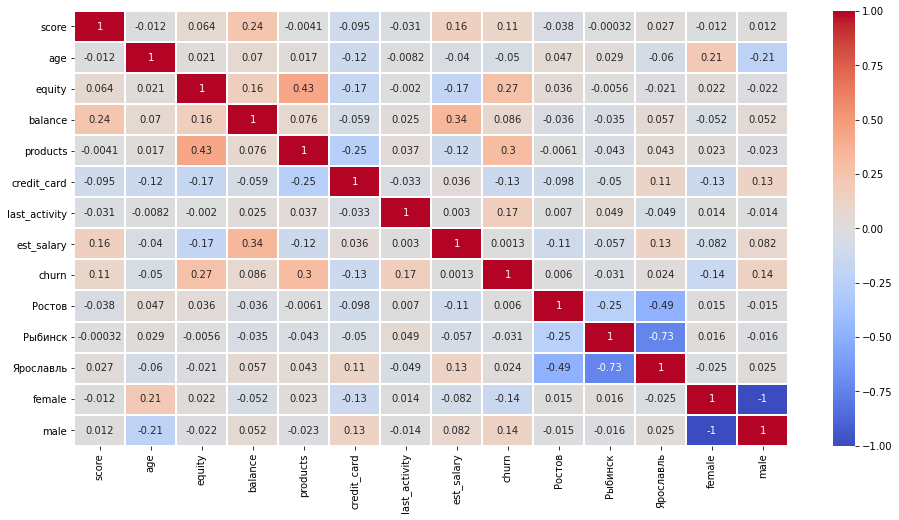

In [29]:
plt.figure(figsize=(16,8))
data_without_id = data.drop(columns=['user_id'])
sns.heatmap(data_without_id.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=1)
plt.show()

По матрице корреляции можно сделать вывод, что наибольшую корреляцию имеют показатели:
* кредитный скоринг
* количество баллов собственности
* количество продуктов, которыми пользуется клиент
* наличие кредитной карты
* активность клиента
* пол клиента
* возраст клиента

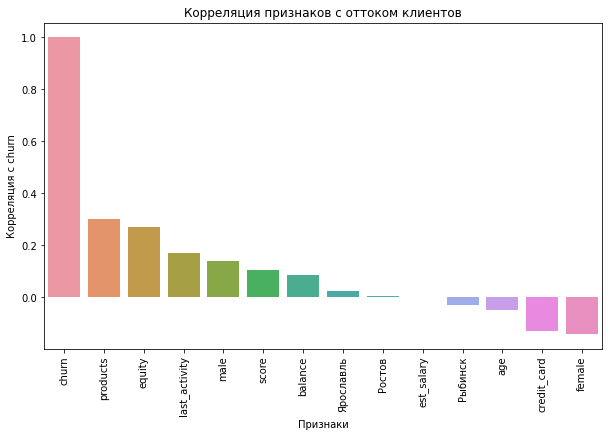

Интерпретация корреляции по шкале Чеддока:
churn: Сильная корреляция (1.00)
products: Слабая корреляция (0.30)
equity: Очень слабая корреляция (0.27)
last_activity: Очень слабая корреляция (0.17)
male: Очень слабая корреляция (0.14)
score: Очень слабая корреляция (0.11)
balance: Очень слабая корреляция (0.09)
Ярославль: Очень слабая корреляция (0.02)
Ростов: Очень слабая корреляция (0.01)
est_salary: Очень слабая корреляция (0.00)
Рыбинск: Очень слабая корреляция (-0.03)
age: Очень слабая корреляция (-0.05)
credit_card: Очень слабая корреляция (-0.13)
female: Очень слабая корреляция (-0.14)


In [30]:
churn_corr = data_without_id.corr()['churn'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr.index, y=churn_corr.values)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Корреляция с churn')
plt.title('Корреляция признаков с оттоком клиентов')
plt.show()

print("Интерпретация корреляции по шкале Чеддока:")
for feature, corr_value in churn_corr.items():
    if abs(corr_value) >= 0.8:
        print(f"{feature}: Сильная корреляция ({corr_value:.2f})")
    elif 0.5 <= abs(corr_value) < 0.8:
        print(f"{feature}: Умеренная корреляция ({corr_value:.2f})")
    elif 0.3 <= abs(corr_value) < 0.5:
        print(f"{feature}: Слабая корреляция ({corr_value:.2f})")
    else:
        print(f"{feature}: Очень слабая корреляция ({corr_value:.2f})")

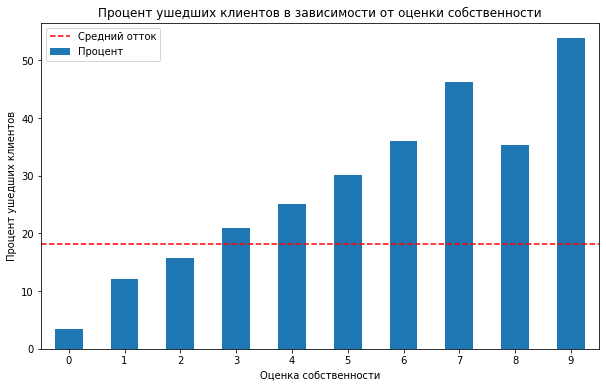

,Ушедшие,Всего,Процент
equity,,,
0,90,2592,3.472222
1,93,774,12.015504
2,166,1052,15.779468
3,322,1543,20.868438
4,464,1850,25.081081
5,577,1918,30.083420
6,58,161,36.024845
7,37,80,46.250000
8,6,17,35.294118


In [31]:
equity_churn = data.pivot_table(index='equity', values='churn', aggfunc=['sum', 'count'])
mean_churn = data['churn'].mean()

equity_churn.columns = ['Ушедшие', 'Всего']
equity_churn['Процент'] = equity_churn['Ушедшие'] / equity_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
equity_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от оценки собственности',
    xlabel='Оценка собственности',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

equity_churn

Здесь прослеживается прямая зависимость - чем выше оценка собственности клиента, тем больше процент оттока. Это также подтверждает предыдущий вывод, что чем клиент состоятельнее, тем меньше потребность в услугах банка (кредитование).

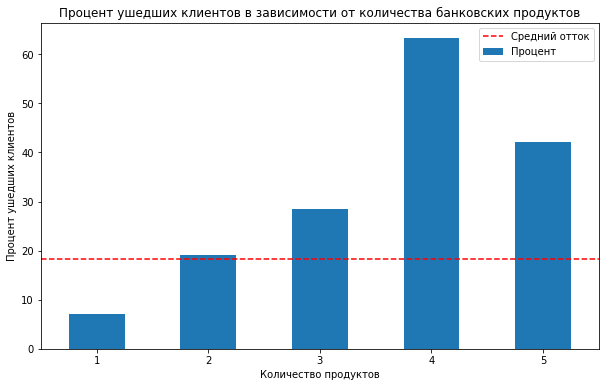

,Ушедшие,Всего,Процент
products,,,
1,235,3341,7.033822
2,979,5126,19.098712
3,297,1039,28.585178
4,300,474,63.291139
5,8,19,42.105263


In [32]:
products_churn = data.query('products > 0')
mean_churn = data['churn'].mean()
products_churn = products_churn.pivot_table(index='products', values='churn', aggfunc=['sum', 'count'])

products_churn.columns = ['Ушедшие', 'Всего']
products_churn['Процент'] = products_churn['Ушедшие'] / products_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
products_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от количества банковских продуктов',
    xlabel='Количество продуктов',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

products_churn

Касательно продуктов имеется тенденция, что чем больше количество используемых продуктов, тем выше отток. При этом в расчет не беру ушедшего клиента с одним продуктом.

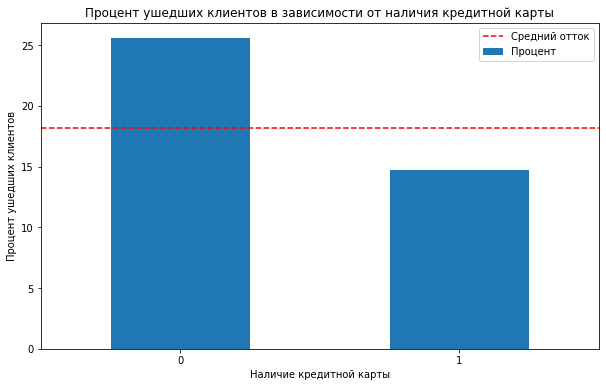

In [33]:
credit_card_churn = data.pivot_table(index='credit_card', values='churn', aggfunc=['sum', 'count'])
mean_churn = data['churn'].mean()

credit_card_churn.columns = ['Ушедшие', 'Всего']
credit_card_churn['Процент'] = credit_card_churn['Ушедшие'] / credit_card_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
credit_card_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от наличия кредитной карты',
    xlabel='Наличие кредитной карты',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

Процент оттока клиентов с кредитной картой - 15%. Без кредитной карты 25%. Скорее всего отток клиентов меньше за счет того, что клиент имеет обязательство в банке, а также возможность использования "дополнительного кошелька". 

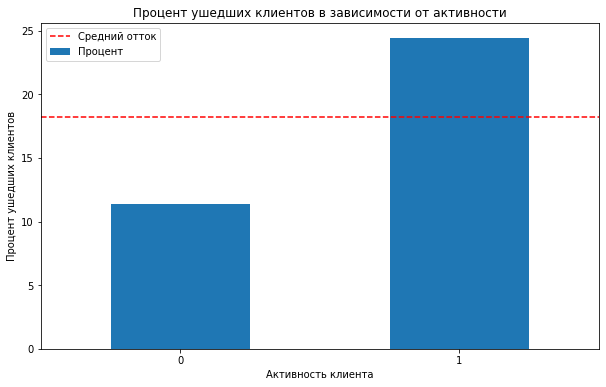

In [34]:
last_activity_churn = data.pivot_table(index='last_activity', values='churn', aggfunc=['sum', 'count'])
mean_churn = data['churn'].mean()

last_activity_churn.columns = ['Ушедшие', 'Всего']
last_activity_churn['Процент'] = last_activity_churn['Ушедшие'] / last_activity_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
last_activity_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от активности',
    xlabel='Активность клиента',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

Здесь наблюдается очень интересная картина. Активные клиенты почти в 2.5 раза больше склонны к оттоку, чем неактивные. По своему опыту работы в банке могу сказать, что активные клиенты на то и активные, что они постоянно взаимодейтсвуют с банком, при этом, чаще всего пользуются и продуктами других банков. Не активными клиентами могут быть те, кто когда-то имел карту/кредит, при этом сейчас имеют только активный счет и никак не взаимодействуют с банком.

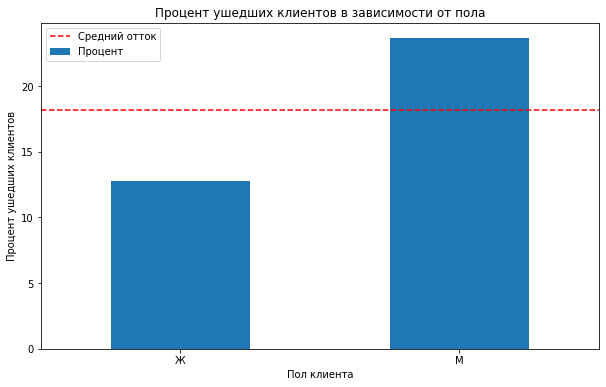

In [35]:
gender_churn = data.pivot_table(index='gender', values='churn', aggfunc=['sum', 'count'])
mean_churn = data['churn'].mean()

gender_churn.columns = ['Ушедшие', 'Всего']
gender_churn['Процент'] = gender_churn['Ушедшие'] / gender_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
gender_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от пола',
    xlabel='Пол клиента',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

Мужчины склонны к оттоку в два раза больше, чем женщины

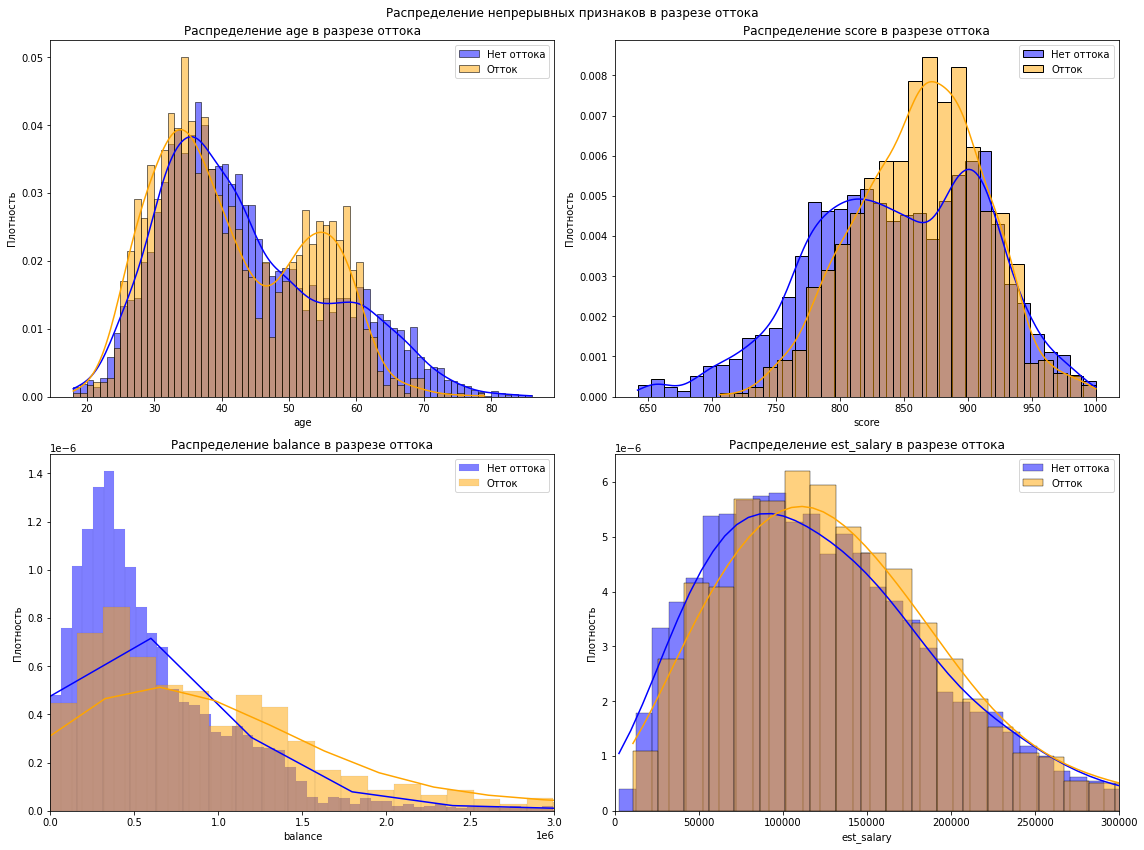

In [36]:
continuous_columns = ['age', 'score', 'balance', 'est_salary']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределение непрерывных признаков в разрезе оттока')

for i, column in enumerate(continuous_columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sns.histplot(
        data[data['churn'] == 0][column], 
        kde=True, 
        color='blue', 
        label='Нет оттока', 
        stat='density', ax=ax,
        binwidth=1 if column == 'age' else None
    )  
    sns.histplot(
        data[data['churn'] == 1][column], 
        kde=True, 
        color='orange', 
        label='Отток', 
        stat='density', ax=ax,
        binwidth=1 if column == 'age' else None
    )
    ax.set_title(f'Распределение {column} в разрезе оттока')
    ax.set_xlabel(column)
    ax.set_ylabel('Плотность')
    ax.legend()

    # Установка ограничений для осей
    if column == 'balance':
        ax.set_xlim(0, 3000000)
    elif column == 'est_salary':
        ax.set_xlim(0, 300000)

plt.tight_layout()
plt.show()

Анализ по каждому параметру:
1. **Возраст** 
* Распределение похоже на бимодальное с пиком в районе 30-35 лет. При этом, также присутствует повышенный отток клиентов в возрасте от 52 до 58 лет.
* Отток: Пик распределения сдвинут немного влево, в сторону более молодых клиентов - 25-30 лет. 
* Вывод: У более молодых клиентов наблюдается более высокий риск оттока.

2. **Кредитный скоринг**
* Распределение похоже на нормальное распределение с пиком около 850 баллов.  
* Отток: Распределение более сконцентрировано в районе 800-930, т.е. у клиентов с более высоким кредитным скорингом наблюдается более высокий риск оттока.
* Вывод: Клиенты с низким кредитным скорингом менее склонны к оттоку. 

3. **Баланс в банке**
* Отток: Наибольшее количество отточных клиентов с балансом от 0 до 500 000
* Вывод: Клиенты с балансом от 0 до 500 000 больше всего подвережены оттоку. Также это можно сказать про категорию клиентов с балансом от 1,1 млн до 1,3 млн.

4. **Заработная плата**
* Видим распределение пуассоновского типа с пиком в районе 120 000
* Вывод: Клиенты с заработной платой от 80 000 до 160 000 больше подвержены оттоку

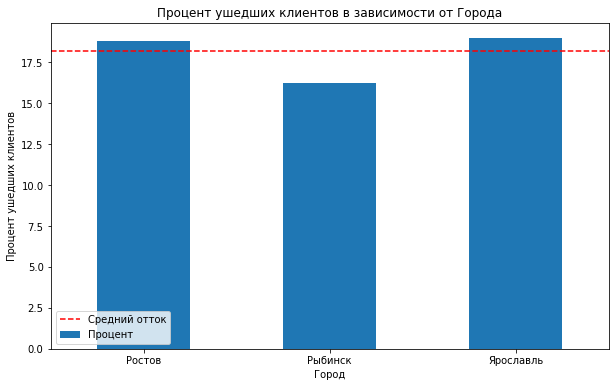

,Ушедшие,Всего,Процент
city,,,
Ростов,266,1417,18.772054
Рыбинск,437,2695,16.215213
Ярославль,1117,5888,18.970788


In [37]:
city_churn = data.pivot_table(index='city', values='churn', aggfunc=['sum', 'count'])
mean_churn = data['churn'].mean()

city_churn.columns = ['Ушедшие', 'Всего']
city_churn['Процент'] = city_churn['Ушедшие'] / city_churn['Всего'] * 100


plt.figure(figsize=(10, 6))
city_churn['Процент'].plot(
    kind='bar',
    title='Процент ушедших клиентов в зависимости от Города',
    xlabel='Город',
    ylabel='Процент ушедших клиентов',
)
plt.axhline(mean_churn * 100, color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.xticks(rotation=0)
plt.show()

city_churn

Все города имеют примерно одинаковый процент оттока, однако, в Рыбинске этот показатель ниже.

### Проверка гипотез

#### Гипотеза 1: Доход ушедших и действующих клиентов различен

H0 - Доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.

H1 - Доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.

#### Обоснованность гипотезы 1

In [38]:
group1 = data[data['churn'] == 0]['est_salary']
group2 = data[data['churn'] == 1]['est_salary']

print('Дисперсия доходов оставшихся клиентов:', np.var(group1).round(2))
print('Дисперсия доходов ушедших клиентов:', np.var(group2).round(2))
print('')
print('Средний доход оставшихся клиентов:', np.mean(group1).round(2))
print('Средний доход ушедших клиентов:', np.mean(group2).round(2))
print('')
print('Размер выборки доходов оставшихся клиентов:', len(group1))
print('Размер выборки доходов ушедших клиентов:', len(group2))

Дисперсия доходов оставшихся клиентов: 20390026478.42
Дисперсия доходов ушедших клиентов: 15099675278.94

Средний доход оставшихся клиентов: 147783.2
Средний доход ушедших клиентов: 148243.01

Размер выборки доходов оставшихся клиентов: 8180
Размер выборки доходов ушедших клиентов: 1820


Гипотезы для теста Шапиро-Уилка:
* Нулевая гипотеза (H0): Данные распределены нормально.
* Альтернативная гипотеза (H1): Данные не распределены нормально.

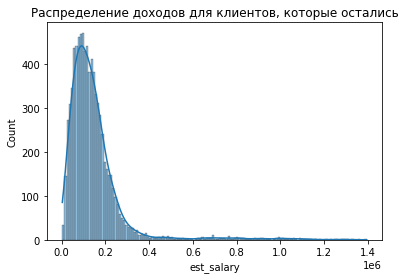

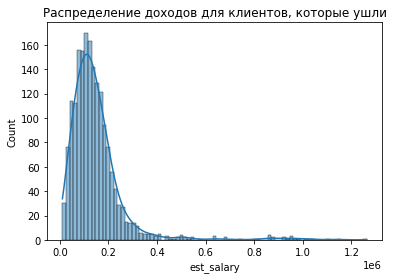

Тест Шапиро-Уилка для оставшихся клиентов:
Статистика: 0.6149210929870605, p-значение: 0.0

Тест Шапиро-Уилка для ушедших клиентов:
Статистика: 0.6442221999168396, p-значение: 0.0
Отвергаем нулевую гипотезу. Данные, вероятно, не распределены нормально.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
sns.histplot(group1, kde=True)
plt.title('Распределение доходов для клиентов, которые остались')
plt.show()
sns.histplot(group2, kde=True)
plt.title('Распределение доходов для клиентов, которые ушли')
plt.show()

print("Тест Шапиро-Уилка для оставшихся клиентов:")
stat, p_value = stats.shapiro(group1)
print(f"Статистика: {stat}, p-значение: {p_value}")

print("\nТест Шапиро-Уилка для ушедших клиентов:")
stat, p_value = stats.shapiro(group2)
print(f"Статистика: {stat}, p-значение: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Данные, вероятно, не распределены нормально.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные могут быть нормально распределены.")

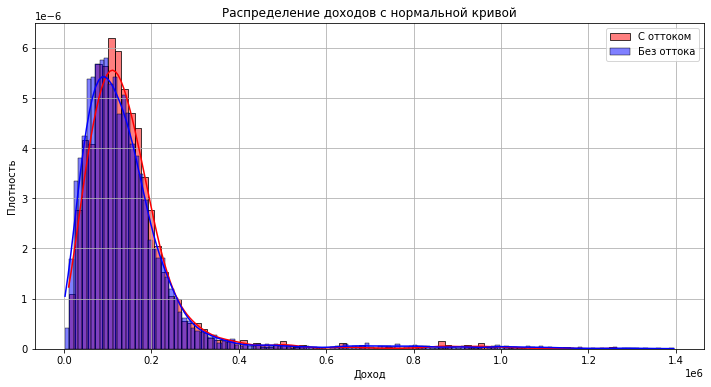

In [40]:
churn_1 = data[data['churn'] == 1]
churn_0 = data[data['churn'] == 0]

plt.figure(figsize=(12, 6))
sns.histplot(
    churn_1['est_salary'].dropna(), 
    kde=True, stat='density', 
    color='red', label='С оттоком')

sns.histplot(
    churn_0['est_salary'].dropna(), 
    kde=True, stat='density', 
    color='blue', label='Без оттока')
plt.title('Распределение доходов с нормальной кривой')
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Исходя из проверки видно, что дисперсия не имеет колоссального различия, хотя размер выборок отличается почти в 8 раз, что в силу большой разницы в размере выборок мы применяем equal_var=False независимо от равенства дисперсий.
Чтобы выяснить, отличаются ли средние доходы у клиентов, которые остались, и тех, кто ушел, можно применить тест Манна-Уитни. Этот тест позволяет проверить, существует ли статистически значимое различие между средними значениями этих двух групп. Видим распределение пуассоновского типа, с хвостом справа. Разница между средними значениями составляет примерно 460 рублей. На первый взгляд, эта разница кажется небольшой. Однако, статистическая значимость не определяется только разницей в средних значениях, но также учитывает вариабельность данных и размер выборки. Таким образом считаем, что средний доход отточных клиентов несколько выше. Касательно теста Шапиро-Уилка доказывает то, что распределение не нормально, поэтому буду использовать тест Манна-Уитни

In [41]:
result = stats.mannwhitneyu(group1, group2)

alpha = 0.05
print(f"P-значение: {result.pvalue}")

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.")

P-значение: 0.000243559272811695
Отвергаем нулевую гипотезу. Средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.


#### Гипотеза 2: Количество используемых банковских продуктов ушедших и действующих клиентов различно

H0 - Количество используемых продуктов клиентами, которые ушли, равно количеству используемых продуктов клиентами, которые остались.

H1 - Количество используемых продуктов клиентами, которые ушли, не равно количеству используемых продуктов клиентами, которые остались.

#### Обоснованность гипотезы 2

In [42]:
group1 = data[data['churn'] == 0]['products']
group2 = data[data['churn'] == 1]['products']

print('Дисперсия количества продуктов оставшихся клиентов:', np.var(group1).round(2))
print('Дисперсия количества продуктов ушедших клиентов:', np.var(group2).round(2))
print('')
print('Среднее количество продуктов оставшихся клиентов:', np.mean(group1).round(2))
print('Среднее количество продуктов ушедших клиентов:', np.mean(group2).round(2))
print('')
print('Размер выборки по количеству продуктов оставшихся клиентов:', len(group1))
print('Размер выборки по количеству продуктов ушедших клиентов:', len(group2))

Дисперсия количества продуктов оставшихся клиентов: 0.51
Дисперсия количества продуктов ушедших клиентов: 0.85

Среднее количество продуктов оставшихся клиентов: 1.76
Среднее количество продуктов ушедших клиентов: 2.38

Размер выборки по количеству продуктов оставшихся клиентов: 8180
Размер выборки по количеству продуктов ушедших клиентов: 1820


Данные не распределены нормально: Количество используемых продуктов, скорее всего, имеет скошенное распределение. Многие клиенты используют 1-2 продукта, а меньшее количество клиентов использует 3, 4 и т.д.
Мы хотим сравнить медианы: Тест Манна-Уитни сравнивает медианы двух групп, что подходит для анализа количества продуктов. Тест Манна-Уитни подходит для порядковых данных. Количество используемых продуктов можно рассматривать как порядковые данные (1 продукт, 2 продукта, 3 продукта и т.д.). По смыслу ttest близок к тесту Мана-Уитни, разница только в том, какие значения используются - абсолютные или ранговые, но идея теста одна - проверка равенства средних. Поэтому если тест Мана-Уитни подходит, то и ttest подходит.
Также хочу обратить внимание на дисперсии - хоть выборки и отличаются в 8 раз, дисперсия не имеет колоссального различия в силу большой разницы в размере выборок мы применяем equal_var=False независимо от равенства дисперсий.

In [43]:
result = stats.ttest_ind(group1, group2, equal_var=False)

alpha = 0.05
print(f"P-значение: {result.pvalue}")

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Среднее количество продуктов у клиентов, которые ушли, отличается от среднего количества продуктов у клиентов, которые остались.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что среднее количество продуктов у клиентов, которые ушли, отличается от среднего количества продуктов у клиентов, которые остались.")

P-значение: 1.9356112628058777e-138
Отвергаем нулевую гипотезу. Среднее количество продуктов у клиентов, которые ушли, отличается от среднего количества продуктов у клиентов, которые остались.


#### Гипотеза 3: Оценка собственности ушедших и действующих клиентов различна

H0 - Оценка собственности клиентов, которые ушли, равна оценке собственности клиентов, которые остались.

H1 - Оценка собственности клиентов, которые ушли, не равна оценке собственности клиентов, которые остались.

In [44]:
group1 = data[data['churn'] == 0]['equity']
group2 = data[data['churn'] == 1]['equity']

print('Дисперсия оценки собственности оставшихся клиентов:', np.var(group1).round(2))
print('Дисперсия оценки собственности ушедших клиентов:', np.var(group2).round(2))
print('')
print('Средняя оценка собственности оставшихся клиентов:', np.mean(group1).round(2))
print('Средняя оценка собственности ушедших клиентов:', np.mean(group2).round(2))
print('')
print('Размер выборки по оценке собственности оставшихся клиентов:', len(group1))
print('Размер выборки по оценке собственности ушедших клиентов:', len(group2))

Дисперсия оценки собственности оставшихся клиентов: 3.89
Дисперсия оценки собственности ушедших клиентов: 2.51

Средняя оценка собственности оставшихся клиентов: 2.37
Средняя оценка собственности ушедших клиентов: 3.76

Размер выборки по оценке собственности оставшихся клиентов: 8180
Размер выборки по оценке собственности ушедших клиентов: 1820


Гипотезы для теста Шапиро-Уилка:

Нулевая гипотеза (H0): Данные распределены нормально.
Альтернативная гипотеза (H1): Данные не распределены нормально.

In [45]:
statistic_churned, pvalue_churned = stats.shapiro(group2)
statistic_active, pvalue_active = stats.shapiro(group1)

print(f"Тест Шапиро-Уилка (ушедшие): {pvalue_churned:.3f}")
print(f"Тест Шапиро-Уилка (действующие): {pvalue_active:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Данные, вероятно, не распределены нормально.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Данные могут быть нормально распределены.")

Тест Шапиро-Уилка (ушедшие): 0.000
Тест Шапиро-Уилка (действующие): 0.000
Отвергаем нулевую гипотезу. Данные, вероятно, не распределены нормально.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Equity также имеет небольшое различие в дисперсиях, при этос различие выборок отличается в 8 раз. Распределение величин не нормально - это показывает тест Шапиро-Уилка. Есть пердпосылки использования теста манна-уитни, но . если тест Мана-Уитни подходит, то и ttest подходит. Equal_var=False применяется так как размер выборок отличается.

In [46]:
group1 = data[data['churn'] == 0]['equity']
group2 = data[data['churn'] == 1]['equity']

result_equity = stats.ttest_ind(group1, group2, equal_var=False)

alpha = 0.05
print(f"P-значение: {result_equity.pvalue}")

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Среднее значение оценки собственности у клиентов, которые ушли, отличается от среднего значения оценки собственности у клиентов, которые остались.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств, чтобы утверждать, что среднее значение оценки собственности у клиентов, которые ушли, отличается от среднего значения оценки собственности у клиентов, которые остались.")

P-значение: 1.2094403736402587e-197
Отвергаем нулевую гипотезу. Среднее значение оценки собственности у клиентов, которые ушли, отличается от среднего значения оценки собственности у клиентов, которые остались.


### Портреты клиентов

In [47]:
columns_table = ['age', 'equity', 'balance', 'products', 'est_salary', 'city', 'gender']

mean = data.groupby('churn')[columns_table].mean().T
median = data.groupby('churn')[['products', 'equity']].median().T
mode = data.groupby('churn')[['city', 'gender', 'credit_card']].agg(lambda x: x.mode()[0]).T
different = (mean[1] - mean[0]) / mean[0]

portrait_table = pd.DataFrame({'Отток': mean[1], 'Не отток': mean[0], 'Относительная разница': different})
median_table = pd.DataFrame({'Отток': median[1], 'Не отток': median[0]})
mode_table = pd.DataFrame({'Отток': mode[1],'Не отток': mode[0]})

final_table = pd.concat([portrait_table, median_table, mode_table], axis=0)
final_table.index = [
    'Средний возраст', 
    'Средняя оценка собственности', 
    'Средний баланс', 
    'Среднее количество продуктов', 
    'Средняя зарплата', 
    'Медианное количество продуктов', 
    'Медианная оценка собственности', 
    'Мода по городу', 
    'Мода по полу',
    'Мода по кредитной карте'
]
pd.options.display.float_format = '{:.2f}'.format
display(final_table)

,Отток,Не отток,Относительная разница
Средний возраст,41.45,43.02,-0.04
Средняя оценка собственности,3.76,2.37,0.58
Средний баланс,1133993.27,733982.59,0.54
Среднее количество продуктов,2.38,1.76,0.35
Средняя зарплата,148243.01,147783.20,0.00
Медианное количество продуктов,2,2,NaN
Медианная оценка собственности,4,3,NaN
Мода по городу,Ярославль,Ярославль,NaN
Мода по полу,М,Ж,NaN
Мода по кредитной карте,1,1,NaN


Типичный портрет не отточного клиента – это женщина среднего возраста, которая пользуется одним или двумя продуктами и предпочитает стабильность. У нее средняя оценка собственности и баланса, и она не склонна к использованию разнообразных банковских продуктов. 

### Промежуточный вывод

Исходя из проведенного анализа можно смело выделить признаки, по которым будет проводиться сегментация пользователей.
Критерии, которые могут подойти для сегментации, с указанием значений повышенного оттока:
1. возраст - 27-42, 46-62
2. кредитный скоринг - 780-900
3. количество используемых - продуктов 3+
4. баланс в банке - 0-700, 1,1кк - 1,3кк
5. наличие кредитной карты - да
6. оценка баллов собственности 3+
7. активность клиента - да

### Сегментация пользователей

**Сегмент 1**

1. возраст: 27-42 лет
2. кредитный скоринг: 780-900
3. не пользуется кредитной картой
4. активный клиент

In [48]:
segment1 = data.query(
    'age >= 27 and age <= 42 and score >= 780 and score <= 900 and credit_card == 0 and last_activity == 1'
)

# Общее число пользователей в сегменте №1
total_users_segment1 = segment1['user_id'].count()
print(f'Общее число пользователей в сегменте №1: {total_users_segment1}')

# Число отточных пользователей в сегменте №1
churned_users_segment1 = segment1[segment1['churn'] == 1]['user_id'].count()
print(f'Число отточных пользователей в сегменте №1: {churned_users_segment1}')

# Доля отточных пользователей в сегменте №1
churn_rate_segment1 = churned_users_segment1 / total_users_segment1 * 100
print(f'Доля отточных пользователей в сегменте №1: {churn_rate_segment1:.2f}%')

Общее число пользователей в сегменте №1: 543
Число отточных пользователей в сегменте №1: 232
Доля отточных пользователей в сегменте №1: 42.73%


**Сегмент 2**

1. возраст: 46-62 года
2. оценка собственности: больше 3х
3. отсутствует кредитная карта

Этот сегмент довольно возрастной, имеет оценку собственности выше 3

In [49]:
segment2 = data.query(
    'age >= 46 and age <= 62 and equity >= 3 and credit_card == 0'
)

total_users_segment2 = segment2['user_id'].count()
print(f'Общее число пользователей в сегменте №2: {total_users_segment2}')

churned_users_segment2 = segment2[segment2['churn'] == 1]['user_id'].count()
print(f'Число отточных пользователей в сегменте №2: {churned_users_segment2}')

churn_rate_segment2 = churned_users_segment2 / total_users_segment2 * 100
print(f'Доля отточных пользователей в сегменте №2: {churn_rate_segment2:.2f}%')

Общее число пользователей в сегменте №2: 685
Число отточных пользователей в сегменте №2: 250
Доля отточных пользователей в сегменте №2: 36.50%


**Сегмент 3**

1. активный клиент
2. имеет 3 и более продукта

In [50]:
segment3 = data.query(
    'last_activity == 1 and products >= 3'
)

total_users_segment3 = segment3['user_id'].count()
print(f'Общее число пользователей в сегменте №3: {total_users_segment3}')

churned_users_segment3 = segment3[segment3['churn'] == 1]['user_id'].count()
print(f'Число отточных пользователей в сегменте №3: {churned_users_segment3}')

churn_rate_segment3 = churned_users_segment3 / total_users_segment3 * 100
print(f'Доля отточных пользователей в сегменте №3: {churn_rate_segment3:.2f}%')

Общее число пользователей в сегменте №3: 824
Число отточных пользователей в сегменте №3: 391
Доля отточных пользователей в сегменте №3: 47.45%


### Приоритизация сегментов

Я хочу выделить сегменты по убыванию доли отточных клиентов

1. Сегмент 3
2. Сегмент 1
3. Сегмент 2

### Итоговый вывод и рекомендации

Исследование показало, что отток клиентов в банке связан с несколькими ключевыми факторами. 

Факторы, повышающие риск оттока:

* Оценка собственности: Чем выше оценка недвижимости клиента, тем больше вероятность его ухода из банка.
* Скоринговый рейтинг: Клиенты с рейтингом от 800 и выше, а также с очень высокими показателями, чаще покидают банк.
* Количество продуктов: Клиенты, использующие 4 продукта, демонстрируют значительно более высокий уровень оттока по сравнению с другими.
* Наличие кредитной карты: Отсутствие кредитной карты у клиента значительно повышает риск его ухода.
* Активность пользователя: Более активные клиенты чаще покидают банк.
* Пол: Мужчины склонны уходить из банка чаще, чем женщины.
* Возраст: Наиболее подверженные оттоку возрастные группы - 46-62 и 25-45 лет.

Были проверены следующие гипотезы:

* Гипотеза 1 - Доход ушедших и действующих клиентов различен - не подтвердилась
* Гипотеза 2 - Количество используемых банковских продуктов ушедших и действующих клиентов различно - подтвердилась
* Гипотеза 3 - Оценка собственности ушедших и действующих клиентов различна - подтвердилась

Рекомендации по отточным сегментам:
* Сегмент 1 - возраст: 27-42 лет, кредитный скоринг: 780-900, не пользуется кредитной картой, активный клиент
Данный сегмент достаточно молод, при этом имеет высокие показатели платежеспособности, а также большой баланс в банке. Этим клиентам я бы рекомендовал предложить кредитную карту, при этом, презентуя ее как дополнительную возможность для получения большей выгоды для клиента (кэшбэки, магазины партнеры). С клиентами с большим балансом стоит выстраивать взаимоотношения немного с другой стороны. Здесь для удержания может помочь персональный менеджер, который будет отвечать за wealth managment таких клиентов, ориентируя на сохранение и преумножение капитала, так как таким клиентам чаще всего не интересны кредиты и базовые финансовые инструменты (вклады, накопительные счета) Таким образом, будут выстраиваться партнерские b2c отношения.

* Сегмент 2 - возраст: 46-62 года, оценка собственности: больше 3х, отсутствует кредитная карта
Данному сегменту можно рекомендовать специальные условия страхования собственности, так как клиенты довольно таки экосистемные и их необходимо подпитывать интересными предложениями. Для клиентов предпенсионного возраста - предложить оформление пенсии в Метанпромбанк. Для клиентов, кто, например, трудоустроен официально предложить перевод заработной платы в наш банк. Также немаловажно предлагать льготные условия по оформлению кредитной карты - так как это довольно простой продукт, с помощью которого получает наибольшую выгоду и банк, и клиент.

* Сегмент 3 - активный клиент, количество используемых продуктов: 3+
Основное преимущество сегмента - активное пользование банком. Такие клиенты часто взаимодействуют с отделениями, поддержкой, контакт-центром и могут быть недовольны даже мелкими, с одного взгляда, недочетами. Здесь можно собирать с таких клиентов обратную связь, под эгидой "Вы - ценный клиент нашего банка. Помогите нам стать лучше.". Также, для повышения лояльности таких клиентов можно разработать спецпредложения по уже действующим продуктам таких клиентов, а также предложить оформить кредитную карту.